<a href="https://colab.research.google.com/github/Khyojae/2025.LLM/blob/main/AE%EC%8B%A4%EC%8A%B5_1117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense,Flatten,Reshape,Conv2D,\
Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


In [ ]:
#MNIST 데이터를 읽고 신경망에 입력할 준비

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))
zdim=32


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# 오토인코더의 인코더 부분 설계
encoder_input=Input(shape=(28,28,1))
x=Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1))(encoder_input)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2D(64,(3,3), activation='relu', padding='same',strides=(1,1))(x)
x=Flatten()(x)
encoder_output=Dense(zdim)(x)
model_encoder=Model(encoder_input,encoder_output)
model_encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       100,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,056 (754.12 KB)

 Trainable params: 193,056 (754.12 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#오토인코더의 디코더 부분 설계
decoder_input = Input(shape=(zdim,))
x=Dense(3136)(decoder_input)
x=Reshape((7,7,64))(x)
x=Conv2DTranspose(64,(3,3),strides=(1,1),padding='same',activation='relu')(x)
x=Conv2DTranspose(64,(3,3),strides=(2,2),padding='same',activation='relu')(x)
x=Conv2DTranspose(32,(3,3),strides=(2,2),padding='same',activation='relu')(x)
x=Conv2DTranspose(1,(3,3),strides=(1,1),padding='same',activation='relu')(x)
decoder_output=x
model_decoder=Model(decoder_input,decoder_output)
model_decoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3136)           │       103,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 64)       │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,097 (766.00 KB)

 Trainable params: 196,097 (766.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 162s 339ms/step - loss: 0.0423 - val_loss: 0.0067
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 336ms/step - loss: 0.0062 - val_loss: 0.0049
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 154s 328ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 154s 328ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 156s 333ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 162s 340ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 336ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 333ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 328ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 156s 333ms/step - loss: 0.0031 - val_loss: 0.0032
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


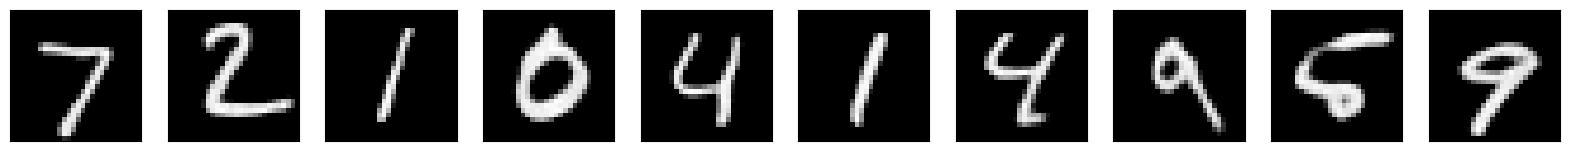

In [11]:
# --- 오토인코더 결합 ---
model_input = encoder_input
model_output = model_decoder(encoder_output)

# ⭐ 수정: 여기서 model 변수를 Model 객체로 정의해야 합니다.
model = Model(model_input, model_output)

# --- 오토인코더 학습 ---
model.compile(optimizer='Adam', loss='mse')
model.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
# ... 이후 코드를 계속 진행합니다.

#인코더와 디코더를 결합하여 오토인코더 모델 구축
model_input = encoder_input
model_output = model_decoder(encoder_output)

#오토인코더 학습
model.compile(optimizer='Adam',loss='mse')
model.fit(x_train,x_train,epochs=5,batch_size=128,shuffle=True,validation_data=(x_test,x_test))

#복원실험 1. x_test를 복원하는 예측실험
decoded_img=model.predict(x_test)
import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(20,4))
for i in range(n):
  plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.xticks([]); plt.yticks([])
  plt.imshow(decoded_img[i].reshape(28,28),cmap='gray')
  plt.xticks([]); plt.yticks([])
plt.show()